**Packages To Load At the Beginning**

In [1]:
# lines starting with '%' are notebook magic functions
# %matplotlib notebook
%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

# standard python packages
import numpy as np
import modin.pandas as pd
import scipy.integrate as integrate
from scipy.stats import gamma as gammafunc
from scipy.special import gamma
from scipy.stats import norm
from time import time
import pickle

# main analysis software can be installed by: pip install Xana
from Xana import Xana
from Xana.Xplot.niceplot import niceplot

# reading AGIPD data provided by XFEL
from extra_data import RunDirectory, stack_detector_data, open_run
from extra_geom import AGIPD_1MGeometry

# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.colors import LogNorm
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

# DASK
import dask.array as da
from dask.distributed import Client, progress
from dask_jobqueue import SLURMCluster

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


# Calculate Azimuthal Intensity

In [3]:
# from midtools import azimuthal_integration from another folder

from azimuthal_integration import azimuthal_integration # from within the midtools folder

ModuleNotFoundError: No module named 'azimuthal_integration'

In [13]:
azimuthal_integration?

In [3]:
mask = ~np.load("/gpfs/exfel/exp/MID/202001/p002458/scratch/masks/mask_cryo.npy")

In [4]:
run = RunDirectory("/gpfs/exfel/exp/MID/202001/p002458/scratch/example_data/r0522/")

In [12]:
azimuthal_integration(run, 
                      method='single', 
                      partition="exfel", # "upex" for users
                      setupfile='./setup_presentation.pkl')

Loaded setupfile:
	/gpfs/exfel/data/user/reiserm/projects/proteins/mid-p2458/midtools/setup_presentation.pkl.
Calculating azimuthal intensity for single trains.
masked 0.00% of the pixels
Cluster dashboard link: https://max-jhub.desy.de/hub/user-redirect/proxy/38800/status
Start calculation...


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://131.169.182.66:57702 remote=tcp://131.169.182.66:34925>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://131.169.182.66:57704 remote=tcp://131.169.182.66:34925>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://131.169.182.66:57706 remote=tcp://131.169.182.66:34925>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://131.169.182.66:57708 remote=tcp://131.169.182.66:34925>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://131.169.182.66:57712 remote=tcp://131.169.182.66:34925>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://131.169.182.66:57714 remote=tcp://131.169.182.66:34925>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://131.169.182.66:57720 remote=tcp://131.169.182.66:34925>


Finished: elapsed time: 7.75min
Filename is ./azimuthal_integration_Iqpr_1586864189.pkl


# Average Full Run

Load the data. Make sure to change the filename.

In [40]:
tmp = pickle.load(open('./azimuthal_integration_Iq_1586815488.pkl', 'rb'))
q, I = tmp['soq']
img = tmp['avr2d']
del tmp

(0.1, 2000.0)

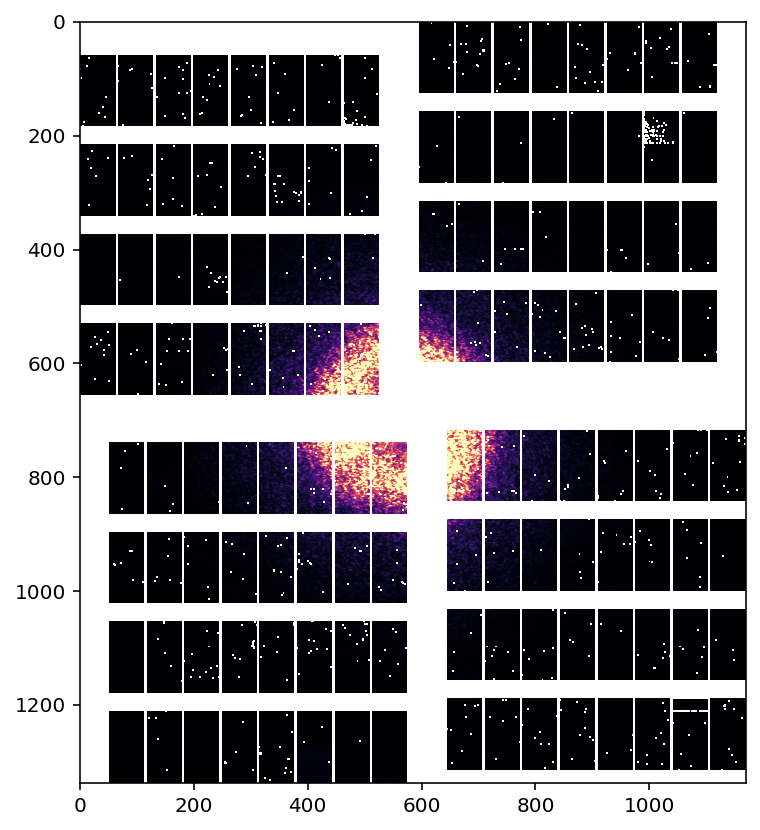

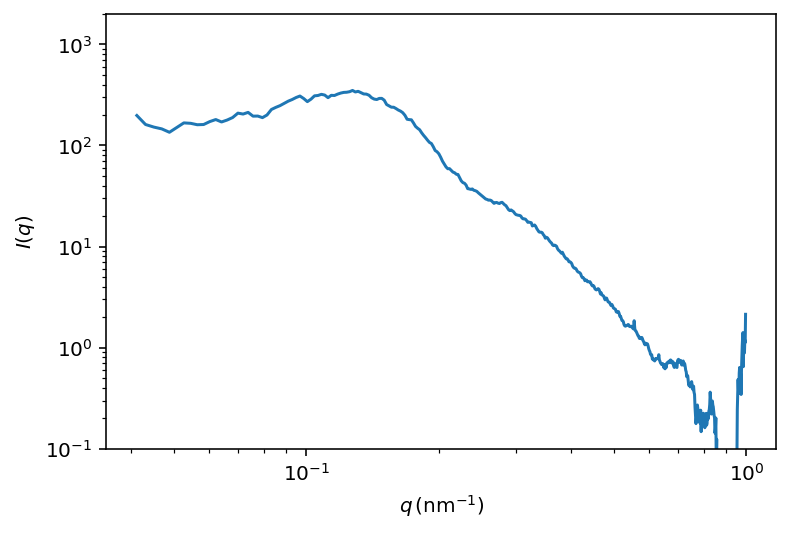

In [41]:
figure(figsize=(7,7))
plt.imshow(img, cmap='magma', vmin=0, vmax=300)

figure()
loglog(q,I)
xlabel(r'$q\,(\mathrm{nm}^{-1})$')
ylabel(r'$I(q)$')
ylim(.1,2e3)

# Pulse Resolved

Load the pulse resolved data.

In [43]:
tmp = pickle.load(open('./azimuthal_integration_Iqpr_1586857178.pkl', 'rb'))
I = tmp['soq-pr']
q = tmp['q(nm-1)']
del tmp

Text(0, 0.5, 'train index')

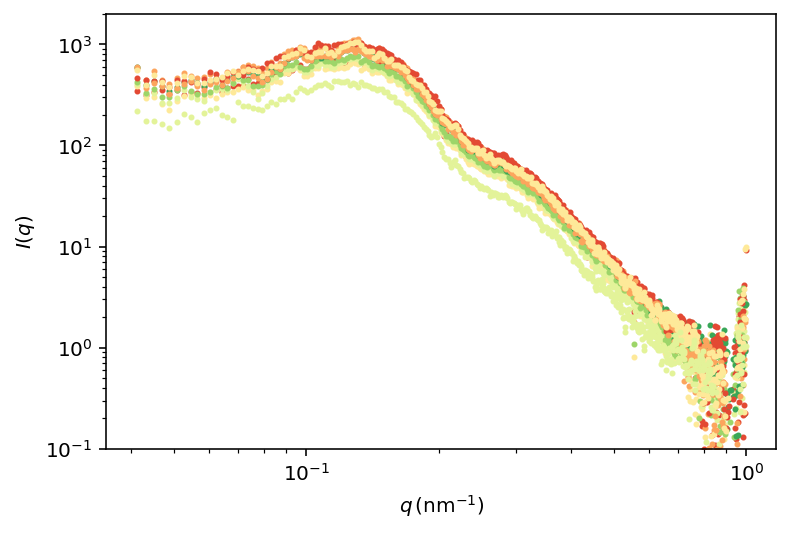

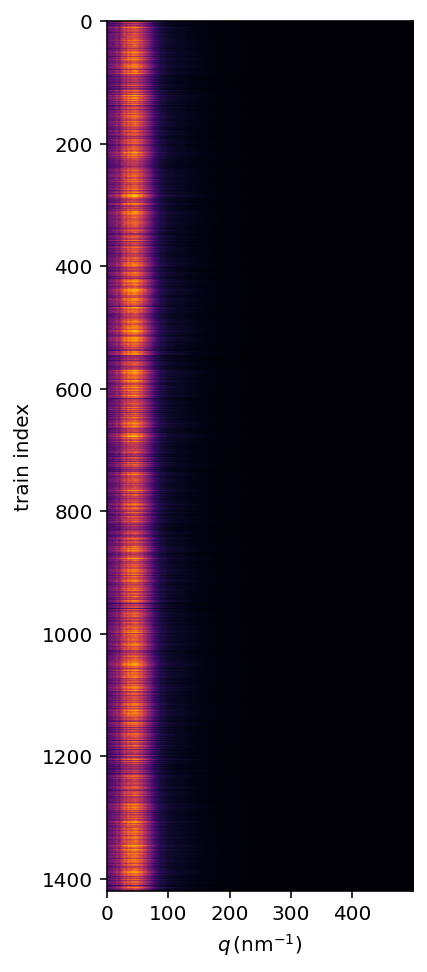

In [47]:
figure()

with sns.color_palette('RdYlGn'):
    for i, n in enumerate(np.arange(0,10000,1000)):
        loglog(q,I[n],'.',ms=4)
    
xlabel(r'$q\,(\mathrm{nm}^{-1})$')
ylabel(r'$I(q)$')
ylim(.1,2e3)

figure(figsize=(8,8))
imshow(I[::100], cmap='inferno')
xlabel(r'$q\,(\mathrm{nm}^{-1})$')
ylabel(r'train index')

# Save As HDF5

Load the data. Make sure to change the filename.

In [5]:
import h5py as h5
import time

In [6]:
tmp = pickle.load(open('../testing/azimuthal_integration_Iq_1586815488.pkl', 'rb'))
q, I = tmp['soq']
img = tmp['avr2d']
del tmp

In [29]:
with h5.File('./test.h5', 'w') as f:
    f["/average/Iq"] = (q,I)
    f["/average/2d"] = img
    print(f["/average/2d"])

<HDF5 dataset "2d": shape (1337, 1170), type "<f4">


In [27]:
with h5.File('./test.h5', 'r') as f:
    q, I = f["/average/Iq"]
    img = f["/average/2d"][:]

(0.1, 2000.0)

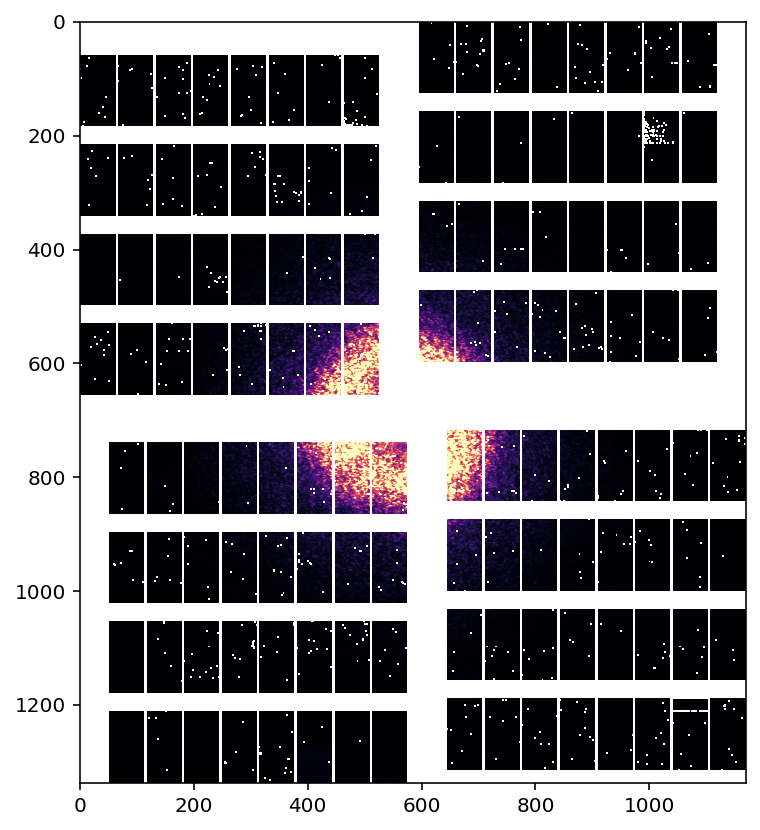

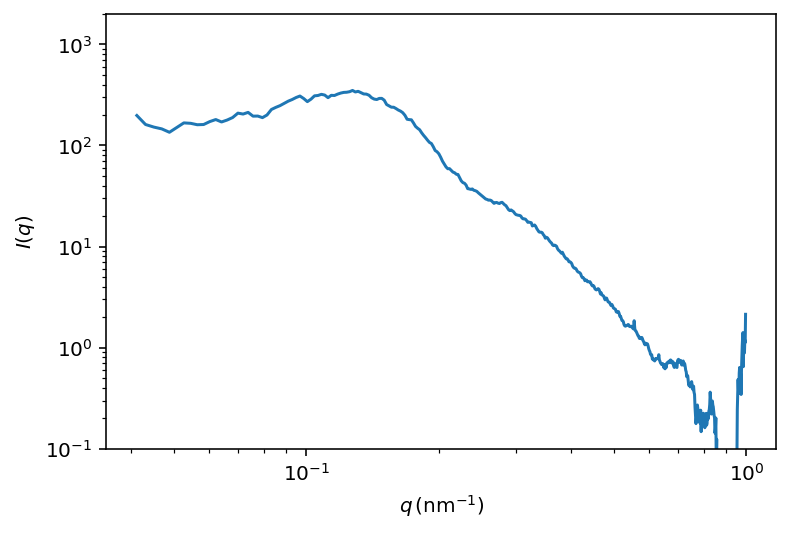

In [28]:
figure(figsize=(7,7))
plt.imshow(img, cmap='magma', vmin=0, vmax=300)

figure()
loglog(q,I)
xlabel(r'$q\,(\mathrm{nm}^{-1})$')
ylabel(r'$I(q)$')
ylim(.1,2e3)

# Pulse Resolved

Load the pulse resolved data.

In [62]:
tmp = pickle.load(open('../testing/azimuthal_integration_Iqpr_1586857178.pkl', 'rb'))
I = tmp['soq-pr']
q = tmp['q(nm-1)']
del tmp

Text(0, 0.5, 'train index')

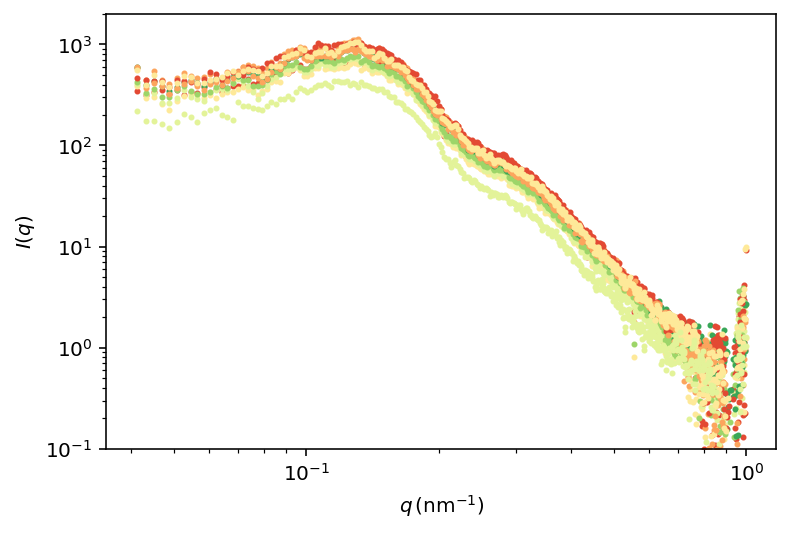

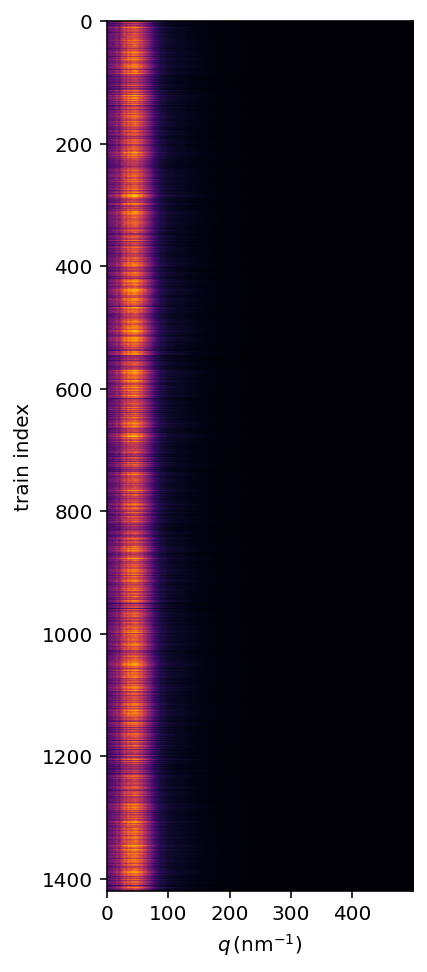

In [64]:
figure()

with sns.color_palette('RdYlGn'):
    for i, n in enumerate(np.arange(0,10000,1000)):
        loglog(q,I[n],'.',ms=4)
    
xlabel(r'$q\,(\mathrm{nm}^{-1})$')
ylabel(r'$I(q)$')
ylim(.1,2e3)

figure(figsize=(8,8))
imshow(I[::100], cmap='inferno')
xlabel(r'$q\,(\mathrm{nm}^{-1})$')
ylabel(r'train index')

In [8]:
identifier = "test" #int(time.time())

In [11]:
tmp = pickle.load(open('../testing/azimuthal_integration_Iq_1586815488.pkl', 'rb'))
q, I = tmp['soq']
img = tmp['avr2d']
del tmp

with h5.File(f'./r522_{identifier}.h5', 'w') as f:
    f["/average/azimuthal_intensity"] = (q,I)
    f["/average/image_2d"] = img
    print(f["/average/image_2d"])

<HDF5 dataset "image_2d": shape (1337, 1170), type "<f4">


In [12]:
mod_train_ids = run.get_dataframe(fields=[('*/DET/*', 'trailer.trainId')])

corrupted_trains = mod_train_ids[mod_train_ids.isna().sum(1)>0].index.values
print(f"found {len(corrupted_trains)} corrupted trains")
print(corrupted_trains)

good_indices = np.where( np.sum(np.isnan(mod_train_ids,), axis=1)==0)[0]

mod_train_ids.reset_index(level=0, inplace=True)
mod_train_ids.rename(columns={"index": "train_id"}, inplace=True)
tmp = mod_train_ids.dropna(axis=0)
good_trains = tmp['train_id']

with h5.File(f'./r522_{identifier}.h5', 'a') as f:    
    f["/identifiers/train_ids"] = good_trains
    f["/identifiers/train_indices"] = good_indices


found 15 corrupted trains
[541834032 541834092 541834212 541834392 541834512 541834532 541834632
 541834732 541834852 541834872 541834992 541835112 541835212 541835252
 541835352]


In [13]:
tmp = pickle.load(open('../testing/azimuthal_integration_Iqpr_1586857178.pkl', 'rb'))
I = tmp['soq-pr']
q = tmp['q(nm-1)']
del tmp

arr = run.get_array('SA2_XTD1_XGM/XGM/DOOCS:output', 'data.intensityTD')
arr = arr[good_indices]

with h5.File(f'./r522_{identifier}.h5', 'a') as f:    
    f["/pulse_resolved/azimuthal_intensity/q"] = q
    f["/pulse_resolved/azimuthal_intensity/I"] = I
    f["/pulse_resolved/xgm/energy"] = arr
    print(f["/pulse_resolved/azimuthal_intensity/I"])


<HDF5 dataset "I": shape (142000, 500), type "<f4">


In [63]:
with h5.File('./r522_test.h5', 'r') as f:
    q = f["/pulse_resolved/azimuthal_intensity/q"][:]
    I = f["/pulse_resolved/azimuthal_intensity/I"][:]

In [17]:
with h5.File('./r522_test.h5', 'r') as f:
    f.visit(print)

average
average/azimuthal_intensity
average/image_2d
identifiers
identifiers/train_ids
identifiers/train_indices
pulse_resolved
pulse_resolved/azimuthal_intensity
pulse_resolved/azimuthal_intensity/I
pulse_resolved/azimuthal_intensity/q
pulse_resolved/xgm
pulse_resolved/xgm/energy


In [103]:
!ls -lrth

total 296M
-rw-r--r--  1 reiserm exfel 2.7K Apr 17 10:32 Untitled.ipynb
-rw-r--r--  1 reiserm exfel 803K Apr 17 17:46 adjust-agipd-geometry.ipynb
-rw-r--r--  1 reiserm exfel 6.0M Apr 21 17:18 test.h5
-rw-r--r--  1 reiserm exfel 6.0M Apr 21 17:19 r522_1587482383.h5
-rw-r--r--  1 reiserm exfel  51K Apr 21 17:33 Make-DataFrame-With-Dask.ipynb
drwxr-xr-x 74 reiserm exfel  32K Apr 21 17:34 dask-worker-space
-rw-r--r--  1 reiserm exfel 4.5M Apr 21 17:36 xpcs-example-data.ipynb
-rw-r--r--  1 reiserm exfel 1.5M Apr 21 17:44 Azimuthal-Integration.ipynb
-rw-r--r--  1 reiserm exfel 277M Apr 21 17:45 r522_test.h5


In [15]:
!pwd

/gpfs/exfel/data/user/reiserm/projects/proteins/mid-p2458/midtools/docs


In [16]:
!cp r522_test.h5 /gpfs/exfel/exp/MID/202001/p002458/scratch/datasets/